In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import timedelta
import eda
%matplotlib inline

# Data Load

## 종합

In [2]:
logistics = pd.read_excel('../data/04_GS_Retail/gs_dataset.xlsx',
                          sheet_name='TB_DD_STR_PURCH_CLS',
                          parse_dates=['OPER_DT'])

logistics.head()

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,2019-02-01,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637
1,2019-02-01,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913
2,2019-02-01,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697
3,2019-02-01,대구광역시,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000
4,2019-02-01,대구광역시,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719


melt함수를 이용해 상품코드 열 생성

In [5]:
logistics = pd.melt(logistics,
                 id_vars=['OPER_DT', 'BOR', 'ADMD', 'AMT_IND'],
                 value_vars=logistics.columns[5:].tolist(),
                 var_name='VAR',
                 value_name='PCT')

def number_search(x):
    """
    문자열에서 숫자를 찾는 함수입니다.
    """
    import re
    
    pattern = re.compile('\d+')
    number = re.search(pattern, x).group()
    
    return number
    

logistics.insert(3, 'ITEM_NM', logistics['VAR'].apply(number_search))

names = {'10':'식사', '20':'간식', '30':'마실거리', '40':'홈&리빙',
         '50':'헬스&뷰티', '60':'취미&여가활동', '70':'사회활동',
         '80':'임신/육아', '90':'기호품'}
logistics['ITEM_NM'] = logistics['ITEM_NM'].map(names)

logistics.drop('VAR', axis=1, inplace=True)

logistics.head()

,OPER_DT,BOR,ADMD,ITEM_NM,AMT_IND,PCT
0,2019-02-01,수성구,고산1동,식사,1.064336,0.450848
1,2019-02-01,수성구,고산2동,식사,1.076418,0.457937
2,2019-02-01,수성구,고산3동,식사,0.856071,0.359978
3,2019-02-01,수성구,두산동,식사,0.724868,0.281969
4,2019-02-01,수성구,만촌1동,식사,1.155728,0.400983


## 매출지수

In [6]:
amount = pd.read_excel('../data/04_GS_Retail/gs_dataset.xlsx',
                      sheet_name='ADMD_AMT_IND', header=3)

amount.head()

,PVN,BOR,ADMD,20190201,20190202,20190203,20190204,20190205,20190206,20190207,...,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
0,전체,NaN,NaN,1.198007,1.017985,0.963684,0.918759,1.028130,0.900022,1.062491,...,1.080985,1.020417,0.885803,1.021254,1.067526,1.063149,1.076086,1.137684,1.045754,0.928725
1,서울특별시,NaN,NaN,1.188696,1.004386,0.953775,0.899579,1.036262,0.892765,1.079589,...,1.162798,1.078928,0.930147,1.098651,1.143194,1.147769,1.169708,1.226083,1.110484,0.978101
2,서울특별시,중구,NaN,1.379749,1.037523,1.013265,0.898529,1.003199,0.892831,1.264520,...,1.230307,0.998263,0.777919,1.186941,1.259630,1.243106,1.289460,1.295647,1.002761,0.849583
3,서울특별시,중구,소공동,1.668360,1.115390,1.211998,1.033635,1.112612,1.054682,1.834032,...,1.484447,0.819555,0.608719,1.334733,1.475264,1.499739,1.566971,1.491554,0.785321,0.680223
4,서울특별시,중구,회현동,1.216539,1.231600,1.216814,1.264384,1.245211,1.186977,1.185489,...,1.123279,0.813363,0.665930,1.198933,1.253730,1.236836,1.179716,1.232473,0.793768,0.773963


In [7]:
# 동별 매출 지수 데이터프레임 재구조화.
amount = pd.melt(amount, id_vars=['PVN','BOR','ADMD'],
               value_vars=amount.columns.tolist()[3:],
               var_name='OPER_DT',
               value_name='AMT_IND')
amount['OPER_DT'] = amount['OPER_DT'].astype('datetime64')
amount = amount.set_index('OPER_DT')
amount = amount.fillna('')
amount.index.name = None

amount.head()

,PVN,BOR,ADMD,AMT_IND
2019-02-01,전체,,,1.198007
2019-02-01,서울특별시,,,1.188696
2019-02-01,서울특별시,중구,,1.379749
2019-02-01,서울특별시,중구,소공동,1.668360
2019-02-01,서울특별시,중구,회현동,1.216539


#### amount_all : 날짜별 전체지역 매출지수 평균

In [8]:
amount_all = amount.iloc[amount.index != '2020-02-29'].query('PVN == "전체"')[['AMT_IND']]
amount_all.head()

## 질병 데이터

In [10]:
covid = pd.read_csv('../data/06_Epidemic_Datasets/KR_COVID_0823.csv', parse_dates=['Date_reported'])
covid.rename(columns={' New_cases':'PT_CNT', ' Cumulative_cases':'PT_CUM_CNT', 'Date_reported':'STD_YMD'}, inplace=True)
covid = covid[['STD_YMD', 'PT_CNT', 'PT_CUM_CNT']]
covid = covid.set_index('STD_YMD')['2020-02-01':'2020-05-31']
covid = covid.dropna()
covid.head()

,PT_CNT,PT_CUM_CNT
STD_YMD,,
2020-02-01,1,16
2020-02-02,3,19
2020-02-03,0,19
2020-02-04,1,20
2020-02-05,2,22


### 비교의 편의를 위해 2019년 매출지수, 2020년 매출지수, 코로나19 확진자 수를 column으로 가지는 table "sales" 생성

In [27]:
sales = pd.DataFrame(amount['2019'].reset_index().assign(SHIFT_YMD = lambda x: x['index'] + pd.DateOffset(years=1))\
                   .set_index('SHIFT_YMD').resample('D')[['AMT_IND']].mean())

sales.rename(columns={'AMT_IND' : 'AMT_IND_19'}, inplace=True)
sales['AMT_IND_20'] = amount['2020'].resample('1D')[['AMT_IND']].mean()
sales['AMT_IND_GAP'] = sales['AMT_IND_19'] - sales['AMT_IND_20']
sales['PT_CNT'] = covid['PT_CNT']
sales.head()

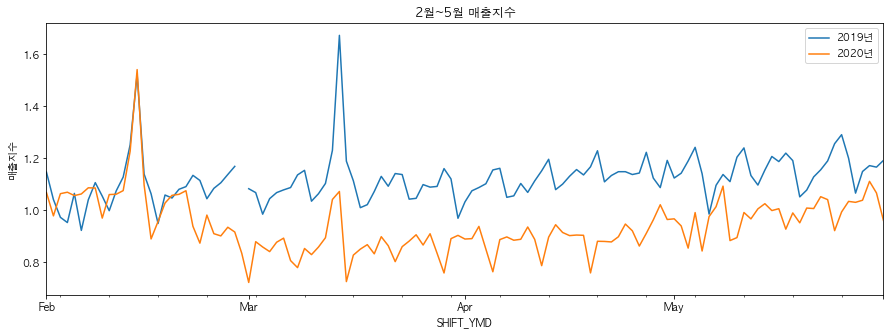

In [29]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))

sales['AMT_IND_19'].plot(ax=ax)
sales['AMT_IND_20'].plot(ax=ax)

ax.set_title('2월~5월 매출지수')
ax.set_ylabel('매출지수')
ax.set_xticklabels(['Feb', 'Mar', 'Apr', 'May'])

plt.legend(["2019년", "2020년"])
plt.show()

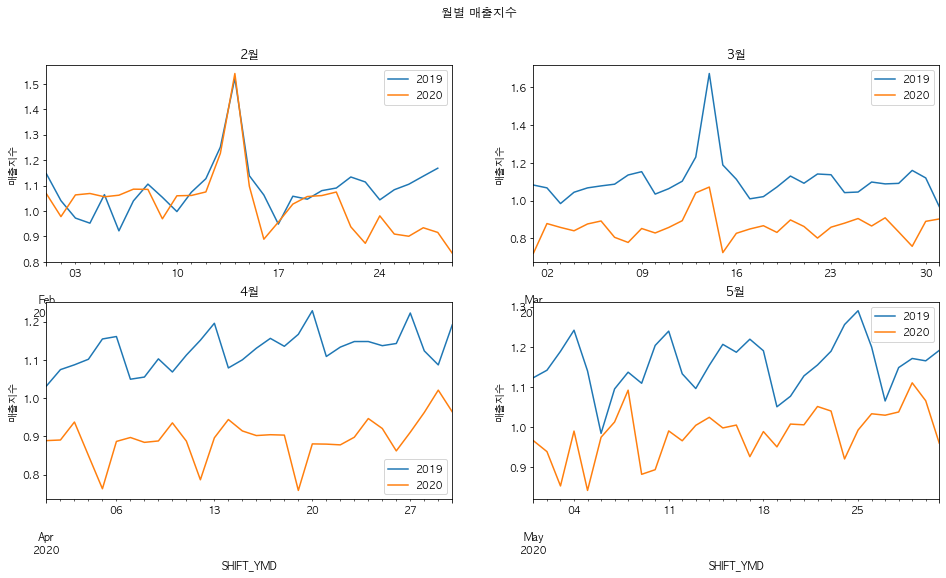

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

sales['2020-02']['AMT_IND_19'].plot(ax=axs[0][0])
sales['2020-02']['AMT_IND_20'].plot(ax=axs[0][0])

sales['2020-03']['AMT_IND_19'].plot(ax=axs[0][1])
sales['2020-03']['AMT_IND_20'].plot(ax=axs[0][1])

sales['2020-04']['AMT_IND_19'].plot(ax=axs[1][0])
sales['2020-04']['AMT_IND_20'].plot(ax=axs[1][0])

sales['2020-05']['AMT_IND_19'].plot(ax=axs[1][1])
sales['2020-05']['AMT_IND_20'].plot(ax=axs[1][1])


for i in range(2):    
    for j in range(2):
        axs[i][j].set_title(f'{i*2+j+2}월')
        axs[i][j].set_ylabel('매출지수')
        #axs[i][j].set_xticks(xticks[i*2+j])
        #axs[i][j].set_xticklabels(['{}'.format(i) if i % 3 == 0 else '' for i in range(1, len(xticks[i*2+j]))])
        axs[i][j].legend(['2019', '2020'])
        
fig.suptitle('월별 매출지수')

plt.show()

<b> => 일정 구간을 단위로 '증가->유지->감소'의 패턴을 확인. <br> 이를 요일에 의한 패턴의 반복으로 예측

#### 요일별 매출지수(2019 -> 2020)

In [32]:
for i in range(0,7,1):
    print(amount_all['2019'].reset_index().query('index.dt.weekday==@i')['AMT_IND'].mean(), end = ' -> ')
    print(amount_all['2020'].reset_index().query('index.dt.weekday==@i')['AMT_IND'].mean())

1.1245675375882356 -> 0.9728139702352943
1.1880354027058824 -> 0.9704803994705882
1.2043723672941178 -> 0.9900139384117647
1.267290286235294 -> 1.0022093770588236
1.2368928562777777 -> 1.0545095298823532
1.169522856882353 -> 0.9451253217058823
1.0596498145294118 -> 0.8306898677777778


=> 요일별 매출 차이 존재 확인

#### 요일별 데이터

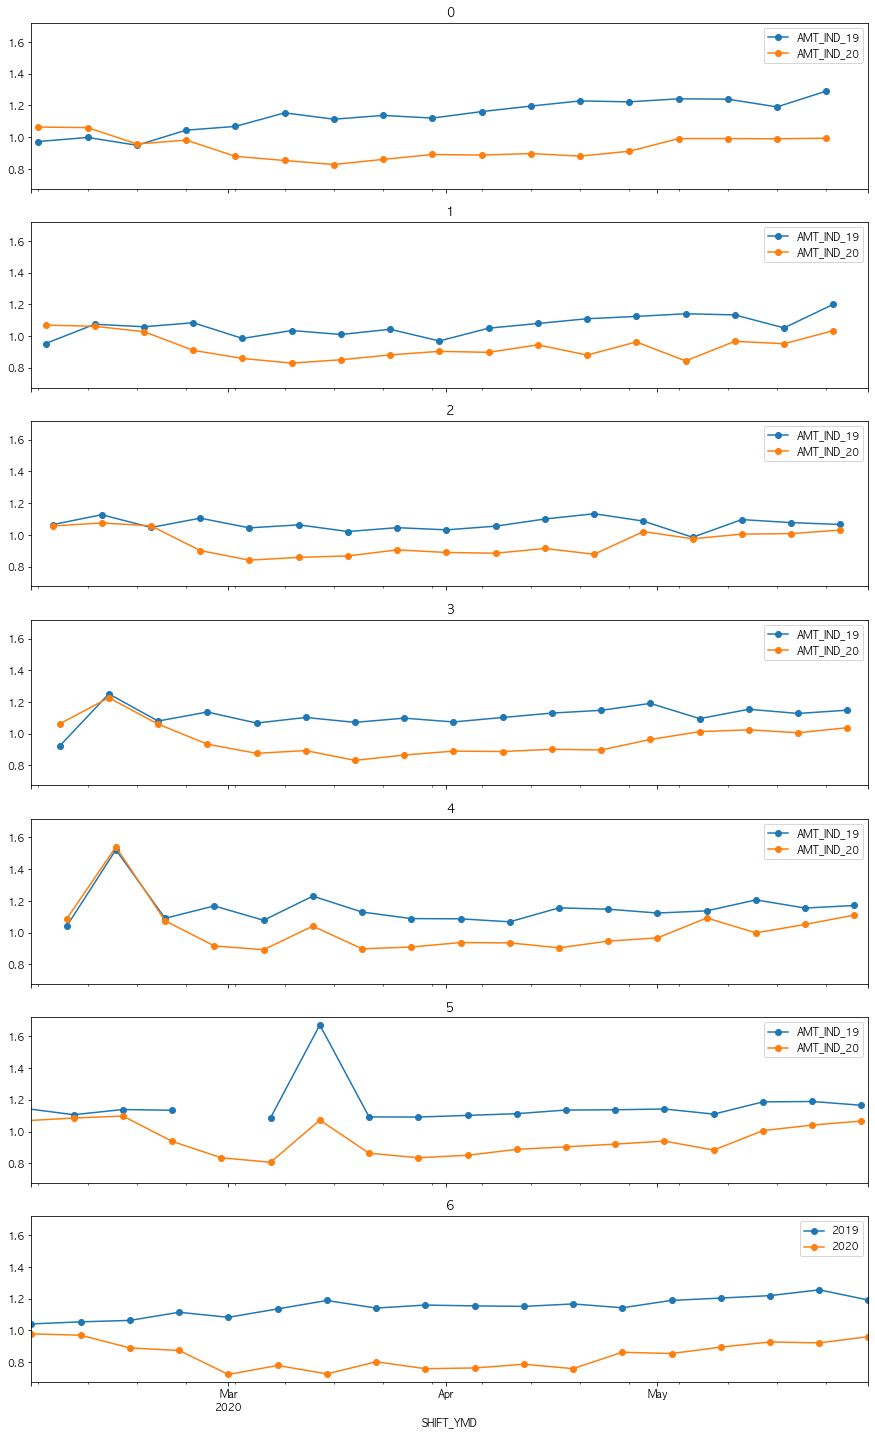

In [33]:
fig, ax = plt.subplots(7, 1, figsize=(15,25), sharex=True, sharey=True)

for i in range(0,7,1):
    sales[['AMT_IND_19']].query('index.dt.weekday==@i').plot(marker='o', ax=ax[i])
    sales[['AMT_IND_20']].query('index.dt.weekday==@i').plot(marker='o', ax=ax[i])
    ax[i].set_title(f'{i}')
    
plt.legend(['2019', '2020'])
plt.show()

## 구별 데이터 탐색

### 구별 dataframe 생성

In [ ]:
def make_sales_table(original, new):
    #original : 지역별로 나눈 amount_지역이니셜 table
    #new : 지역별로 나눈 sales_지역이니셜 table
    new = pd.DataFrame(original['2019'].reset_index().assign(SHIFT_YMD = lambda x: x['index'] + pd.DateOffset(years=1))\
                      .set_index('SHIFT_YMD').resample('D')[['AMT_IND']].mean())
    new.rename(columns={'AMT_IND' : 'AMT_IND_19'}, inplace=True)
    new['AMT_IND_20'] = original['2020'].resample('1D')[['AMT_IND']].mean()
    new['AMT_IND_GAP'] = new['AMT_IND_19'] - new['AMT_IND_20']
    new['PT_CNT'] = covid['PT_CNT']
    return new

In [34]:
amount_sj = amount.query('PVN=="서울특별시" & BOR=="중구"').iloc[1:]
amount_sn = amount.query('PVN=="서울특별시" & BOR=="노원구"').iloc[1:]
amount_dj = amount.query('PVN=="대구광역시" & BOR=="중구"').iloc[1:]
amount_ds = amount.query('PVN=="대구광역시" & BOR=="수성구"').iloc[1:]

In [35]:
sales_sj = pd.DataFrame()
sales_sn = pd.DataFrame()
sales_dj = pd.DataFrame()
sales_ds = pd.DataFrame()

In [36]:
sales_sj = make_sales_table(amount_sn, sales_sn)
sales_sn = make_sales_table(amount_sn, sales_sn)
sales_dj = make_sales_table(amount_sn, sales_sn)
sales_ds = make_sales_table(amount_sn, sales_sn)

In [37]:
sales = make_sales_table(amount_all, sales)

<b> 서울 중구 주 평균 매출지수

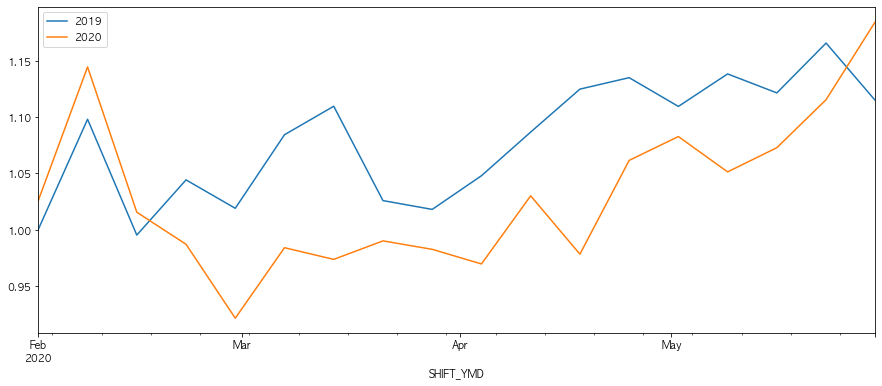

In [38]:
fig, ax = plt.subplots(figsize=(15,6))

sales_sj['AMT_IND_19'].resample('7D').mean().plot(ax=ax)
sales_sj['AMT_IND_20'].resample('7D').mean().plot(ax=ax)

plt.legend(['2019', '2020'])
plt.show()

#### 서울 노원구 주 평균 매출지수

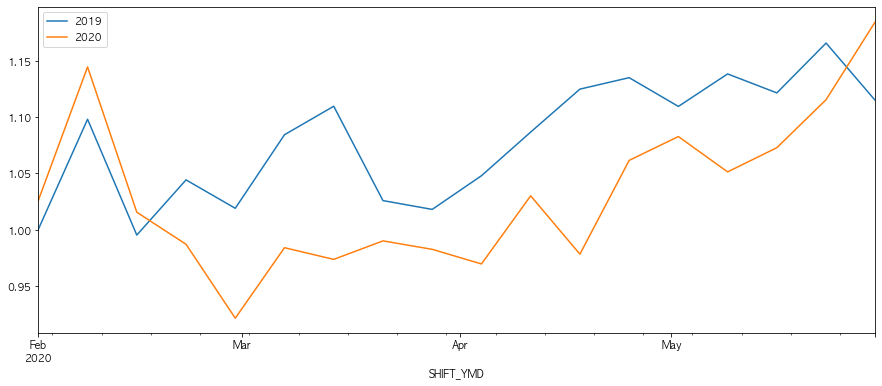

In [39]:
fig, ax = plt.subplots(figsize=(15,6))

sales_sn['AMT_IND_19'].resample('7D').mean().plot(ax=ax)
sales_sn['AMT_IND_20'].resample('7D').mean().plot(ax=ax)

plt.legend(['2019', '2020'])
plt.show()

#### 대구 중구 주 평균 매출지수

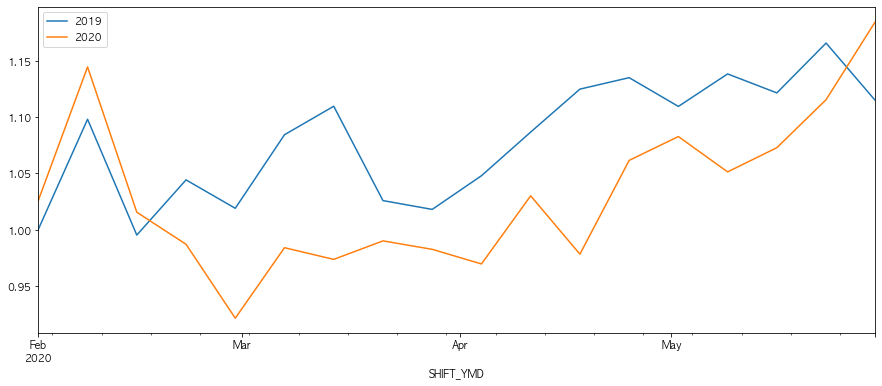

In [40]:
fig, ax = plt.subplots(figsize=(15,6))

sales_dj['AMT_IND_19'].resample('7D').mean().plot(ax=ax)
sales_dj['AMT_IND_20'].resample('7D').mean().plot(ax=ax)

plt.legend(['2019', '2020'])
plt.show()

#### 대구 수성구 주 평균 매출지수

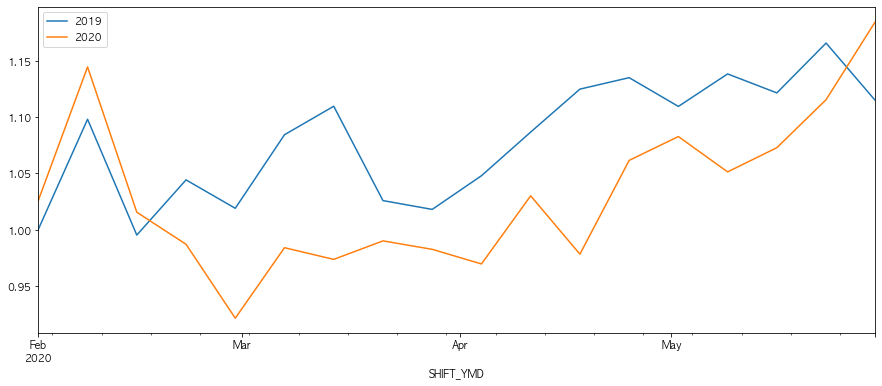

In [41]:
fig, ax = plt.subplots(figsize=(15,6))

sales_ds['AMT_IND_19'].resample('7D').mean().plot(ax=ax)
sales_ds['AMT_IND_20'].resample('7D').mean().plot(ax=ax)

plt.legend(['2019', '2020'])
plt.show()

<b> 서울 중구 요일별 매출지수

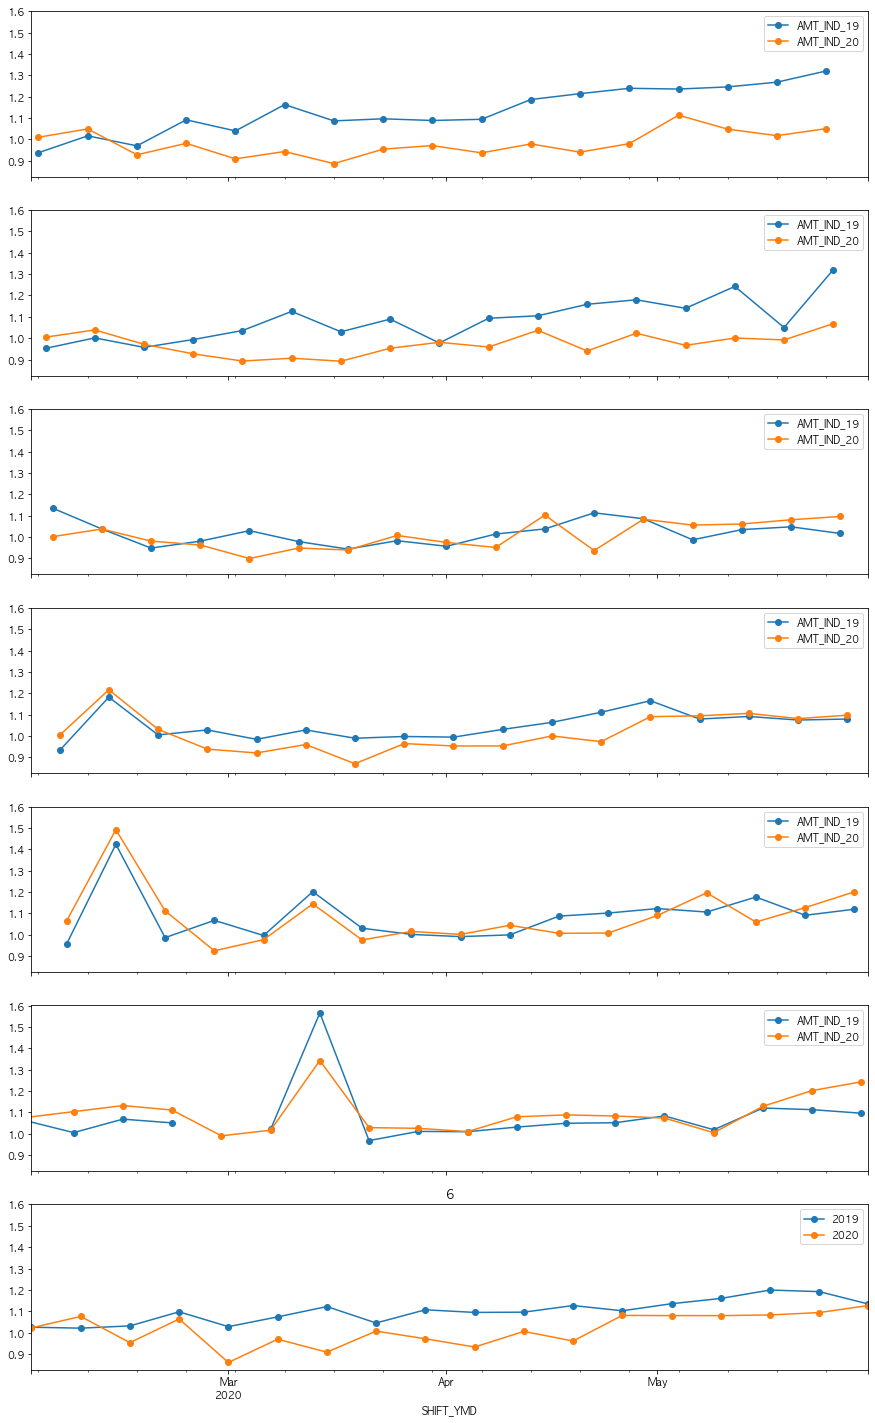

In [42]:
fig, ax = plt.subplots(7, 1, figsize=(15,25), sharex=True, sharey=True)

for i in range(0,7,1):
    sales_sj[['AMT_IND_19']].query('index.dt.weekday==@i').plot(marker='o', ax=ax[i])
    sales_sj[['AMT_IND_20']].query('index.dt.weekday==@i').plot(marker='o', ax=ax[i])
    plt.title(i)
    
plt.legend(['2019', '2020'])
    
plt.show()

#### 서울 노원구 요일별 매출지수

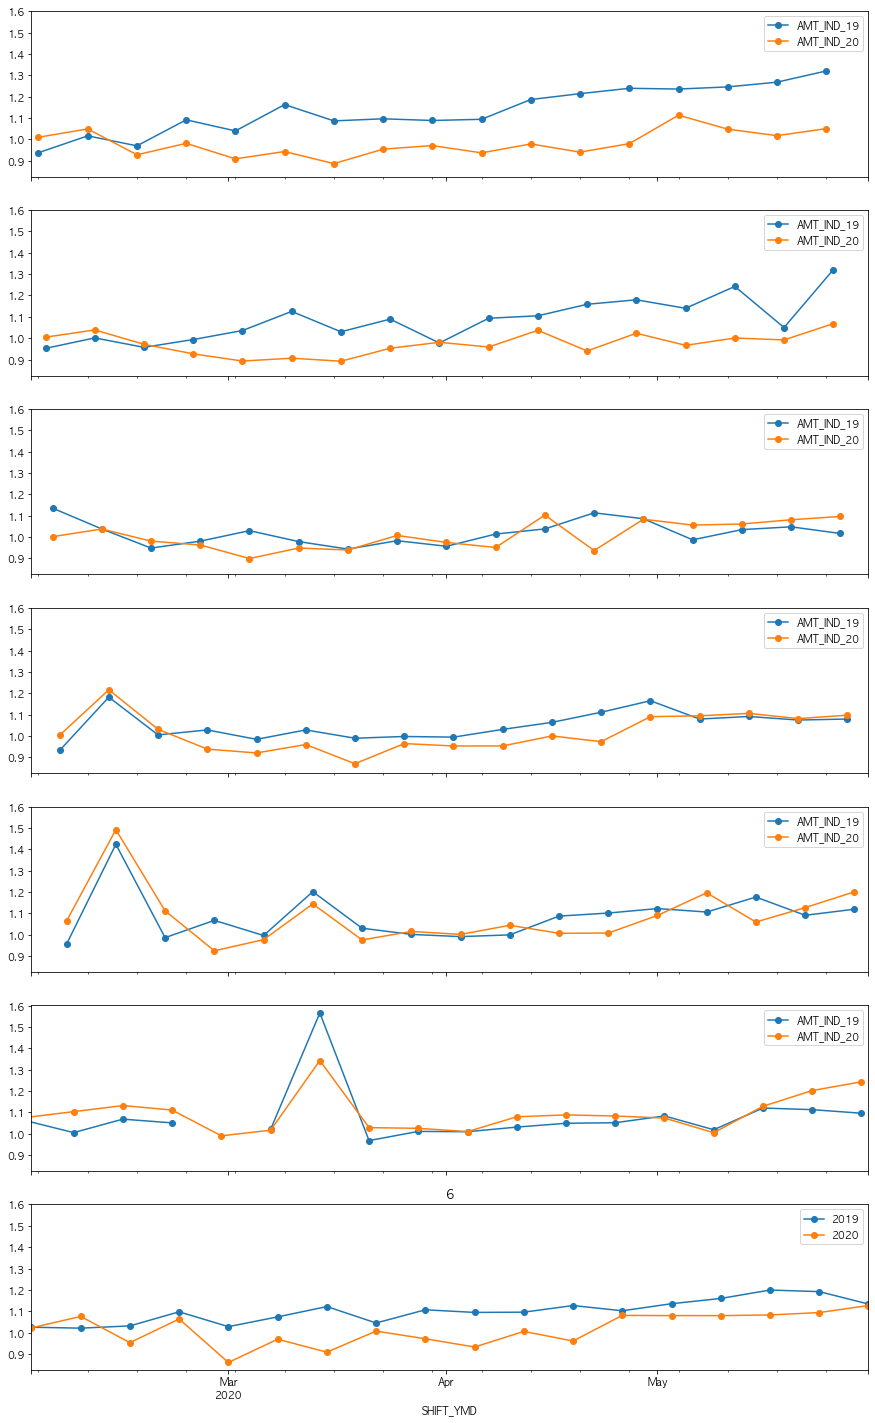

In [43]:
fig, ax = plt.subplots(7, 1, figsize=(15,25), sharex=True, sharey=True)

for i in range(0,7,1):
    sales_sn[['AMT_IND_19']].query('index.dt.weekday==@i').plot(marker='o', ax=ax[i])
    sales_sn[['AMT_IND_20']].query('index.dt.weekday==@i').plot(marker='o', ax=ax[i])
    plt.title(i)
    
plt.legend(['2019', '2020'])
    
plt.show()

#### 대구 중구 요일별 매출지수

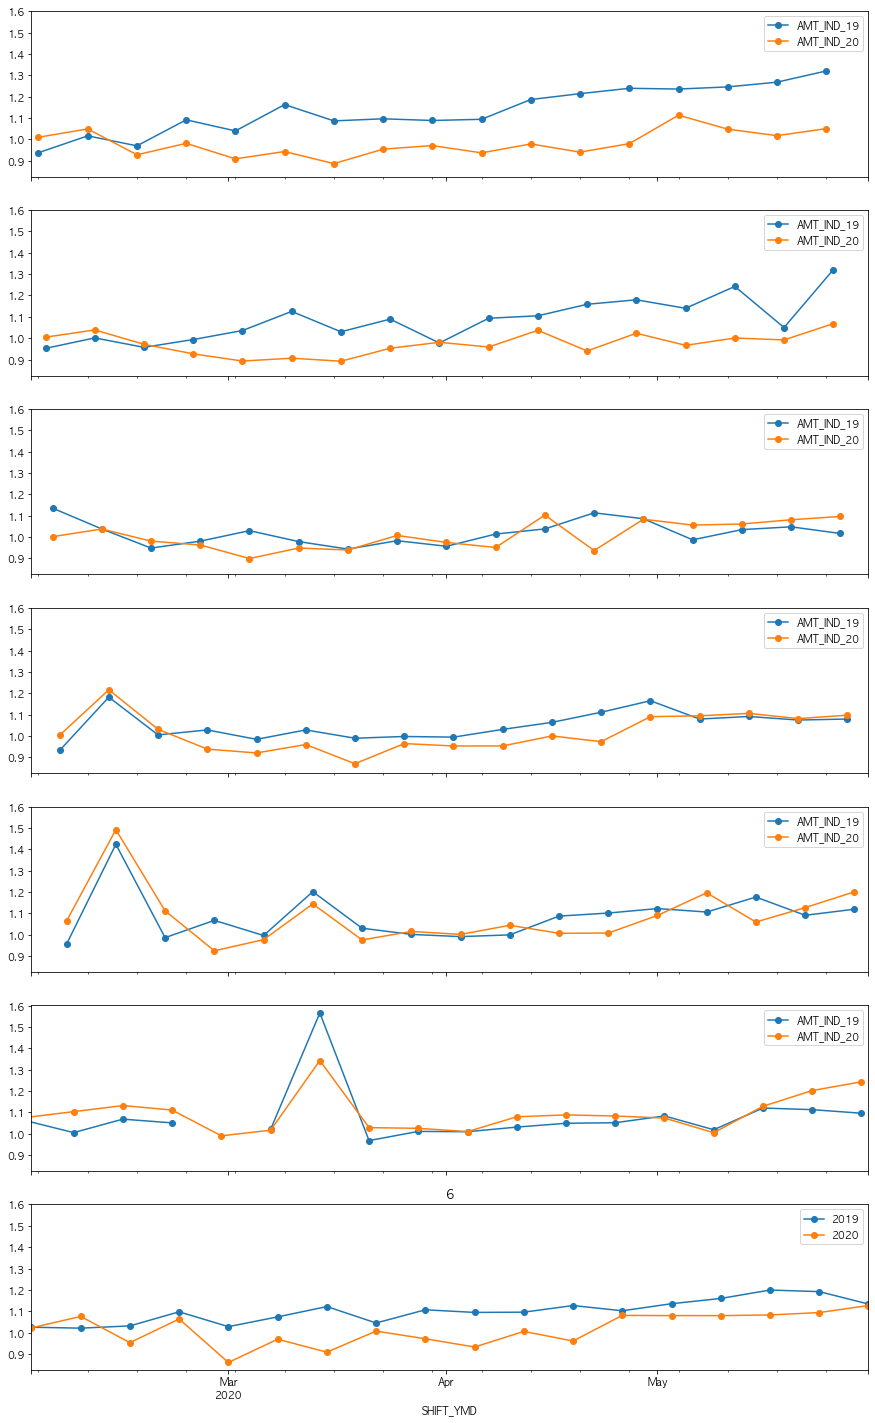

In [44]:
fig, ax = plt.subplots(7, 1, figsize=(15,25), sharex=True, sharey=True)

for i in range(0,7,1):
    sales_dj[['AMT_IND_19']].query('index.dt.weekday==@i').plot(marker='o', ax=ax[i])
    sales_dj[['AMT_IND_20']].query('index.dt.weekday==@i').plot(marker='o', ax=ax[i])
    plt.title(i)
    
plt.legend(['2019', '2020'])
    
plt.show()

#### 대구 수성구 요일별 매출지수

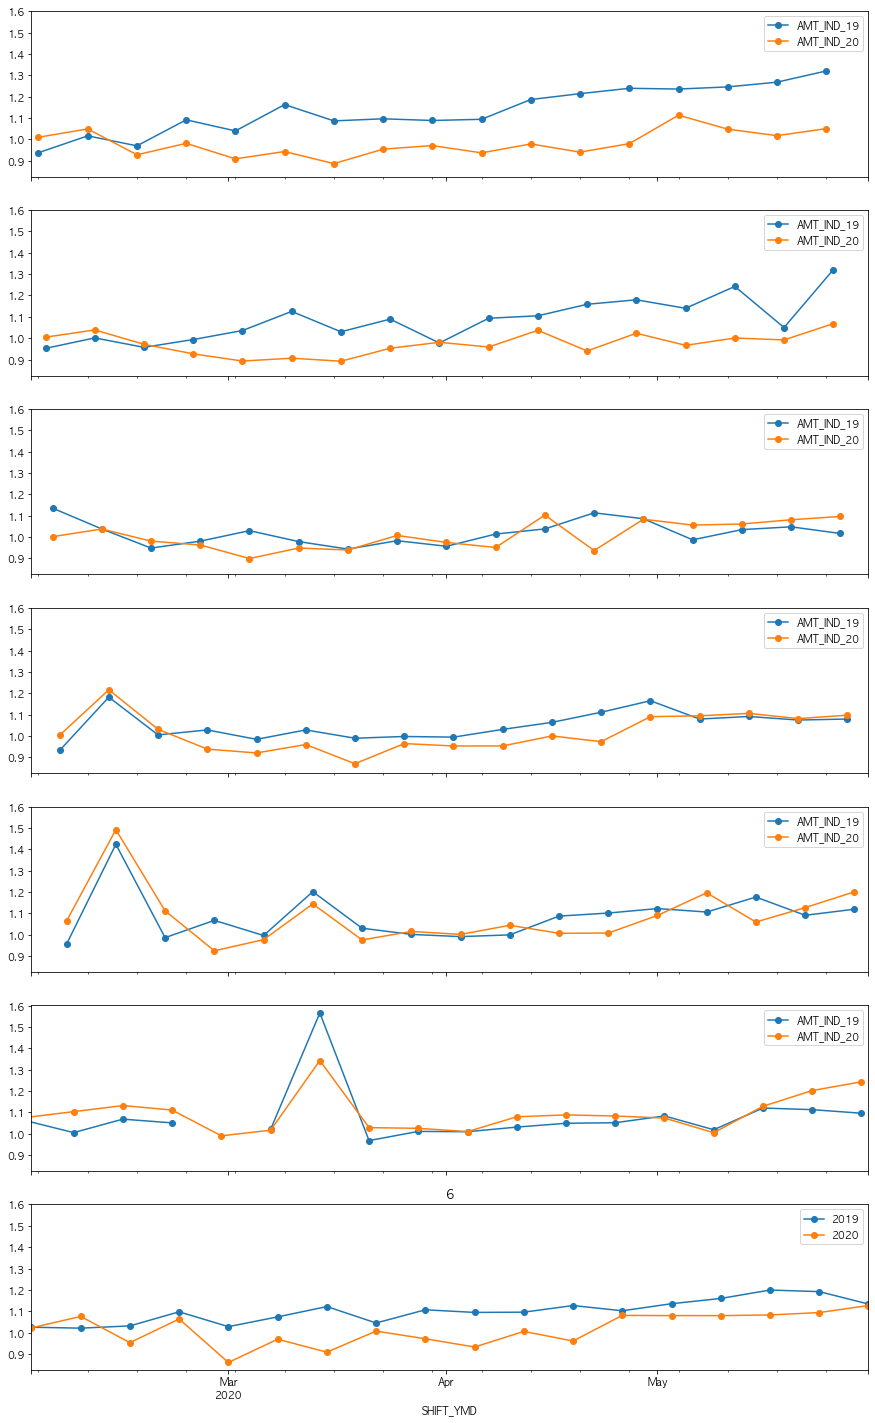

In [45]:
fig, ax = plt.subplots(7, 1, figsize=(15,25), sharex=True, sharey=True)

for i in range(0,7,1):
    sales_ds[['AMT_IND_19']].query('index.dt.weekday==@i').plot(marker='o', ax=ax[i])
    sales_ds[['AMT_IND_20']].query('index.dt.weekday==@i').plot(marker='o', ax=ax[i])
    plt.title(i)
    
plt.legend(['2019', '2020'])
    
plt.show()

## 비중

In [46]:
cat = pd.read_excel('../data/04_GS_Retail/gs_dataset.xlsx',
                    sheet_name='CAT_PCT')

In [47]:
cat = pd.melt(cat, id_vars = ['PVN', 'BOR', 'ADMD', 'ANTC_ITEM_LCLS_NM'],
              value_vars = cat.columns.tolist()[5:],
              var_name = 'OPER_DT',
              value_name = 'PCT')

cat['OPER_DT'] = cat['OPER_DT'].astype('datetime64')
cat = cat.fillna(0)
cat = cat.rename(columns={'ANTC_ITEM_LCLS_NM': 'ITEM_NM'})
cat = cat.assign(DAY=cat['OPER_DT'].apply(lambda x:x.day_name()))
cat = cat.set_index('OPER_DT')
cat.head()

In [50]:
cat.describe()

,PCT
count,115680.000000
mean,0.125000
std,0.142765
min,-0.078816
25%,0.006721
50%,0.037349
75%,0.261664
max,0.622538


In [52]:
cat.shape

(115680, 6)

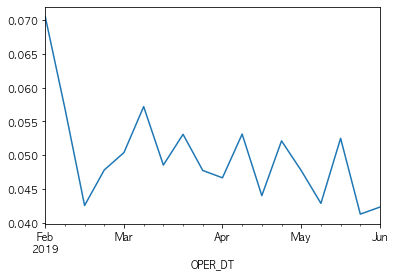

In [53]:
cat['2019'].query('BOR == "수성구"').groupby(['ITEM_NM', pd.Grouper(freq='W')])['PCT'].mean().unstack('ITEM_NM')['헬스&뷰티'].plot()
plt.show()

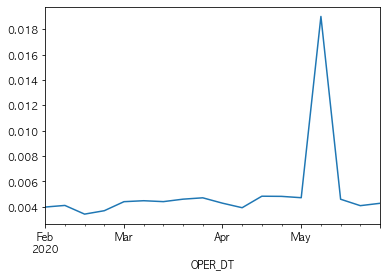

In [54]:
cat['2020'].query('BOR == "수성구"').groupby(['ITEM_NM', pd.Grouper(freq='W')])['PCT'].mean().unstack('ITEM_NM')['취미&여가활동'].plot()
plt.show()

In [55]:
h = cat['2020'].query('BOR == "수성구"').groupby(['ITEM_NM', pd.Grouper(freq='W')])['PCT'].mean().unstack('ITEM_NM')['취미&여가활동'].max()

In [56]:
suseong = cat['2020'].query('BOR == "수성구"').groupby(['ITEM_NM', pd.Grouper(freq='W')])['PCT'].mean().unstack('ITEM_NM')

In [58]:
cat['2019'].query('PCT < 0')

,PVN,BOR,ADMD,ITEM_NM,PCT,DAY
OPER_DT,,,,,,
2019-02-03,서울특별시,노원구,상계10동,취미&여가활동,-0.000261,Sunday
2019-02-07,대구광역시,수성구,지산2동,사회활동,-0.002426,Thursday
2019-02-12,서울특별시,중구,동화동,취미&여가활동,-0.000930,Tuesday
2019-02-13,대구광역시,수성구,지산2동,사회활동,-0.006961,Wednesday
2019-02-14,대구광역시,수성구,범물1동,헬스&뷰티,-0.004535,Thursday
2019-02-18,대구광역시,수성구,지산2동,사회활동,-0.002545,Monday
2019-02-19,대구광역시,수성구,지산2동,취미&여가활동,-0.006677,Tuesday
2019-02-25,대구광역시,수성구,지산2동,취미&여가활동,-0.003154,Monday
2019-02-26,대구광역시,수성구,지산2동,취미&여가활동,-0.006786,Tuesday


In [59]:
cat['2020'].query('PCT < 0')['ADMD'].value_counts()

만촌3동     2
지산2동     2
중계본동     2
수성4가동    1
범어4동     1
동화동      1
하계2동     1
지산1동     1
성내2동     1
광희동      1
필동       1
청구동      1
중계4동     1
회현동      1
범물2동     1
공릉1동     1
월계2동     1
Name: ADMD, dtype: int64

일별 평균 매출 지수

In [61]:
item = logistics.drop('AMT_IND', axis=1)

In [66]:
item = item.assign(DAY=item['OPER_DT'].apply(lambda x:x.day_name()))
item.head()

,OPER_DT,BOR,ADMD,ITEM_NM,PCT,DAY
0,2019-02-01,수성구,고산1동,식사,0.450848,Friday
1,2019-02-01,수성구,고산2동,식사,0.457937,Friday
2,2019-02-01,수성구,고산3동,식사,0.359978,Friday
3,2019-02-01,수성구,두산동,식사,0.281969,Friday
4,2019-02-01,수성구,만촌1동,식사,0.400983,Friday


In [67]:
item = item.set_index('OPER_DT')
item.head()

,BOR,ADMD,ITEM_NM,PCT,DAY
OPER_DT,,,,,
2019-02-01,수성구,고산1동,식사,0.450848,Friday
2019-02-01,수성구,고산2동,식사,0.457937,Friday
2019-02-01,수성구,고산3동,식사,0.359978,Friday
2019-02-01,수성구,두산동,식사,0.281969,Friday
2019-02-01,수성구,만촌1동,식사,0.400983,Friday


#### 2019년 비중 TOP10

In [68]:
item.query('OPER_DT.dt.year=="2019"').groupby(['BOR','ITEM_NM'])['PCT'].mean().reset_index()\
.sort_values('PCT', ascending = False)[:10]

,BOR,ITEM_NM,PCT
1,노원구,마실거리,0.362148
9,수성구,마실거리,0.358886
17,중구,마실거리,0.356222
11,수성구,식사,0.343833
3,노원구,식사,0.316299
19,중구,식사,0.315732
0,노원구,간식,0.231963
16,중구,간식,0.210776
8,수성구,간식,0.205828
22,중구,헬스&뷰티,0.064971


#### 2019년 비중 top20 (마실거리, 식사, 간식 제외)

In [69]:
item.query('OPER_DT.dt.year=="2019"').query('ITEM_NM != "마실거리" & ITEM_NM != "식사" & ITEM_NM != "간식"')\
.groupby(['BOR','ITEM_NM'])['PCT'].mean().reset_index().sort_values('PCT', ascending = False)[:20]

,BOR,ITEM_NM,PCT
13,중구,헬스&뷰티,0.064971
8,수성구,헬스&뷰티,0.049288
3,노원구,헬스&뷰티,0.045209
14,중구,홈&리빙,0.031953
4,노원구,홈&리빙,0.025075
9,수성구,홈&리빙,0.021499
10,중구,사회활동,0.011259
5,수성구,사회활동,0.008867
0,노원구,사회활동,0.007601
2,노원구,취미&여가활동,0.007036


#### 2020년 비중 TOP10

In [70]:
item.query('OPER_DT.dt.year=="2020"').groupby(['BOR','ITEM_NM'])['PCT'].mean().reset_index()\
.sort_values('PCT', ascending = False)[:10]

,BOR,ITEM_NM,PCT
9,수성구,마실거리,0.349853
1,노원구,마실거리,0.344814
17,중구,마실거리,0.342022
11,수성구,식사,0.312950
3,노원구,식사,0.311869
19,중구,식사,0.311599
0,노원구,간식,0.244784
8,수성구,간식,0.226757
16,중구,간식,0.214390
22,중구,헬스&뷰티,0.077533


#### 2020년 비중 TOP20 (마실거리, 식사, 간식 제외)

In [71]:
item.query('OPER_DT.dt.year=="2020"').query('ITEM_NM != "마실거리" & ITEM_NM != "식사" & ITEM_NM != "간식"')\
.groupby(['BOR','ITEM_NM'])['PCT'].mean().reset_index().sort_values('PCT', ascending = False)[:20]

,BOR,ITEM_NM,PCT
13,중구,헬스&뷰티,0.077533
8,수성구,헬스&뷰티,0.066644
3,노원구,헬스&뷰티,0.054100
14,중구,홈&리빙,0.037146
4,노원구,홈&리빙,0.027672
9,수성구,홈&리빙,0.026219
10,중구,사회활동,0.008333
5,수성구,사회활동,0.007285
0,노원구,사회활동,0.006106
2,노원구,취미&여가활동,0.005606


#### 품목별 주평균 매출비중 변화 

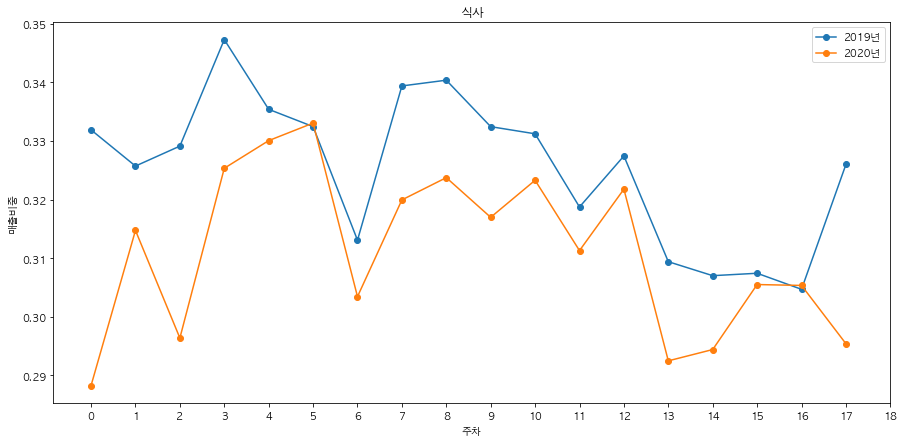

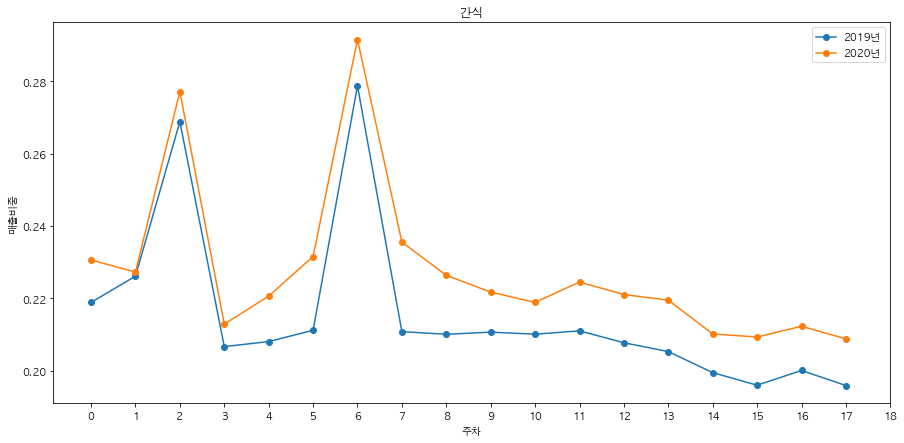

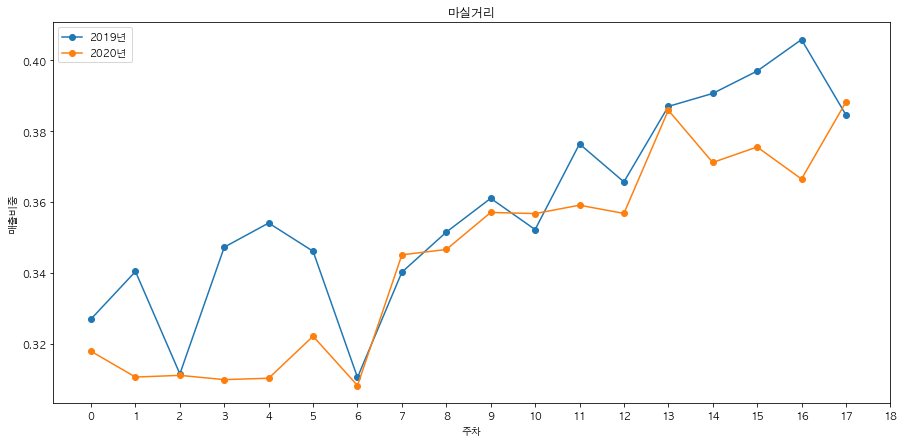

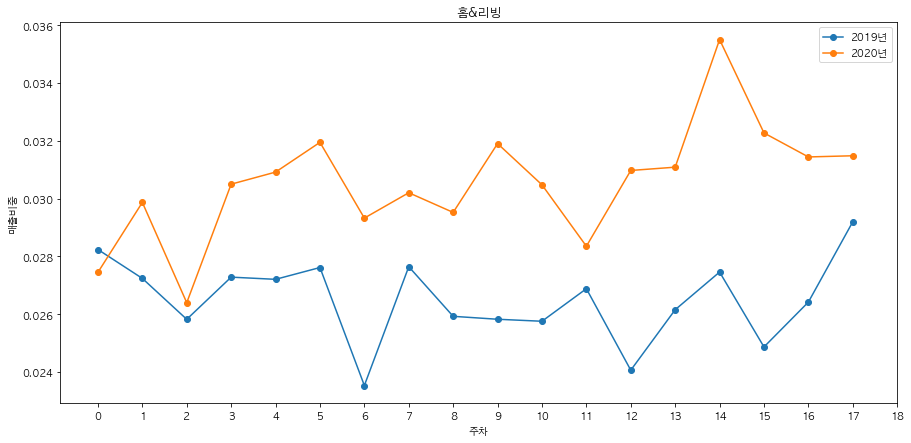

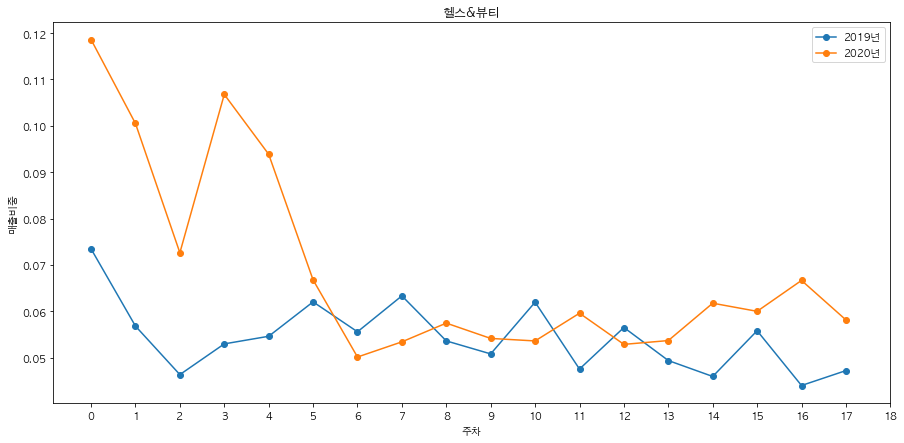

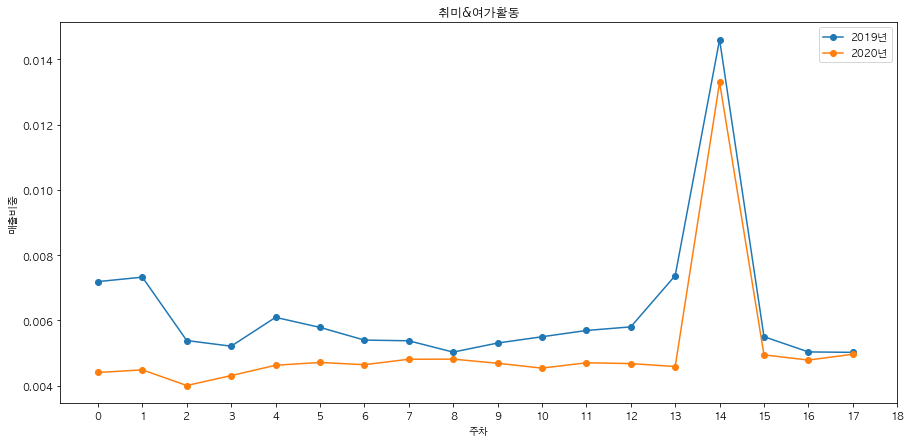

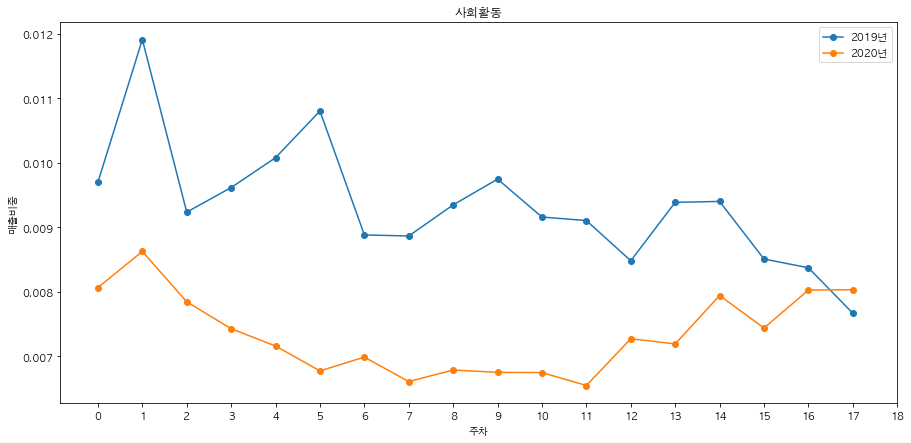

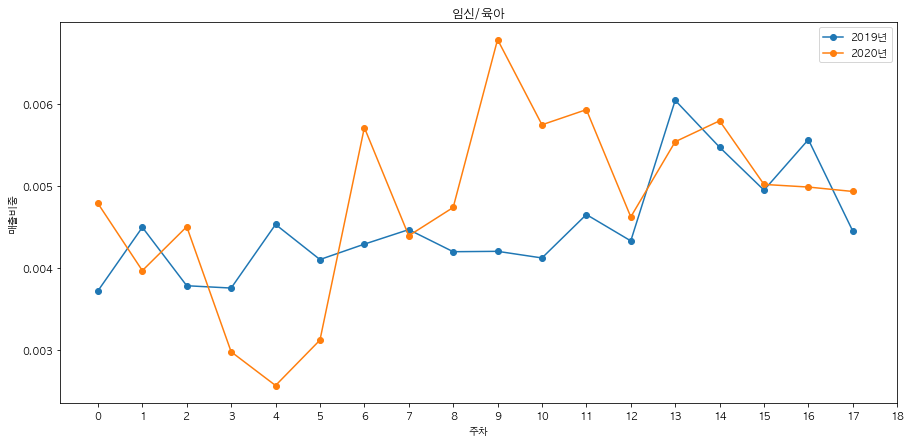

In [72]:
cat = item['ITEM_NM'].unique().tolist()
    
for i in cat:
    fig, ax = plt.subplots(figsize = (15,7))
    
    item.query('OPER_DT.dt.year=="2019"').groupby(['ITEM_NM', pd.Grouper(freq='W')])['PCT'].mean().unstack('ITEM_NM').\
    reset_index()[i].plot(label = '2019',marker = 'o', ax = ax)
    item.query('OPER_DT.dt.year=="2020"').groupby(['ITEM_NM', pd.Grouper(freq='W')])['PCT'].mean().unstack('ITEM_NM').\
    reset_index()[i].plot(label = '2020',marker = 'o', ax = ax)
    
    plt.title(i)
    plt.xlabel('주차')
    plt.ylabel('매출비중')
    plt.legend(['2019년', '2020년'])
    ax.xaxis.set_ticks(np.arange(0, 19, 1))
    
    plt.show()

#### 카테고리별 주 평균 매출비중

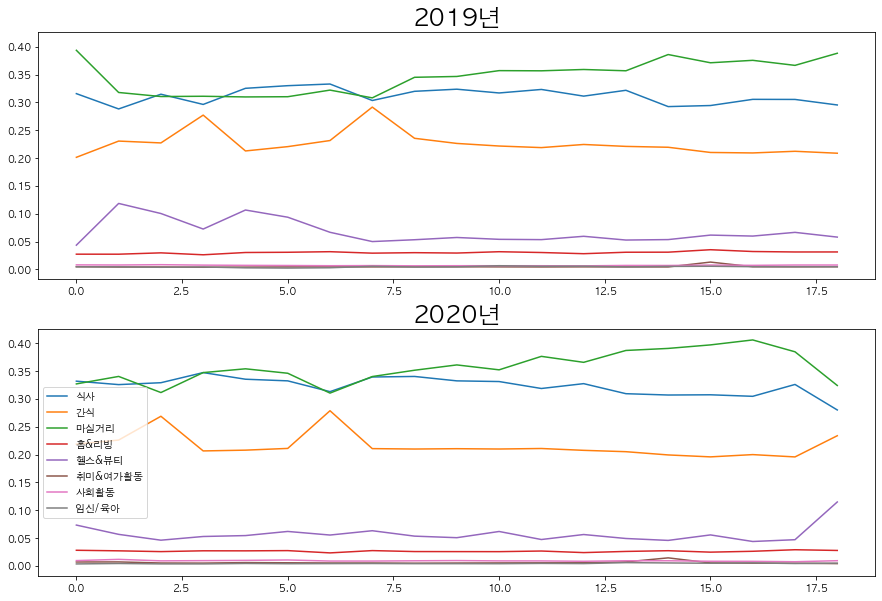

In [73]:
cat = item['ITEM_NM'].unique().tolist()

fig, ax = plt.subplots(2,1, figsize = (15,10), sharey = True )
ax[0].set_title('2019년', fontsize = 24)
ax[1].set_title('2020년', fontsize = 24)

for a in cat:
    item.query('OPER_DT >= "2019-05-31"').query('ITEM_NM == @a').groupby(['ITEM_NM', pd.Grouper(freq='W')])['PCT'].mean().\
    unstack('ITEM_NM').reset_index()[a].plot(ax = ax[0], label = a)

for a in cat:
    item.query('OPER_DT <= "2020-02-01"').query('ITEM_NM == @a').groupby(['ITEM_NM', pd.Grouper(freq='W')])['PCT'].mean().\
    unstack('ITEM_NM').reset_index()[a].plot(ax = ax[1], label = a)    
      

plt.legend()
plt.show()

#### 요일별 카테고리 판매 비중

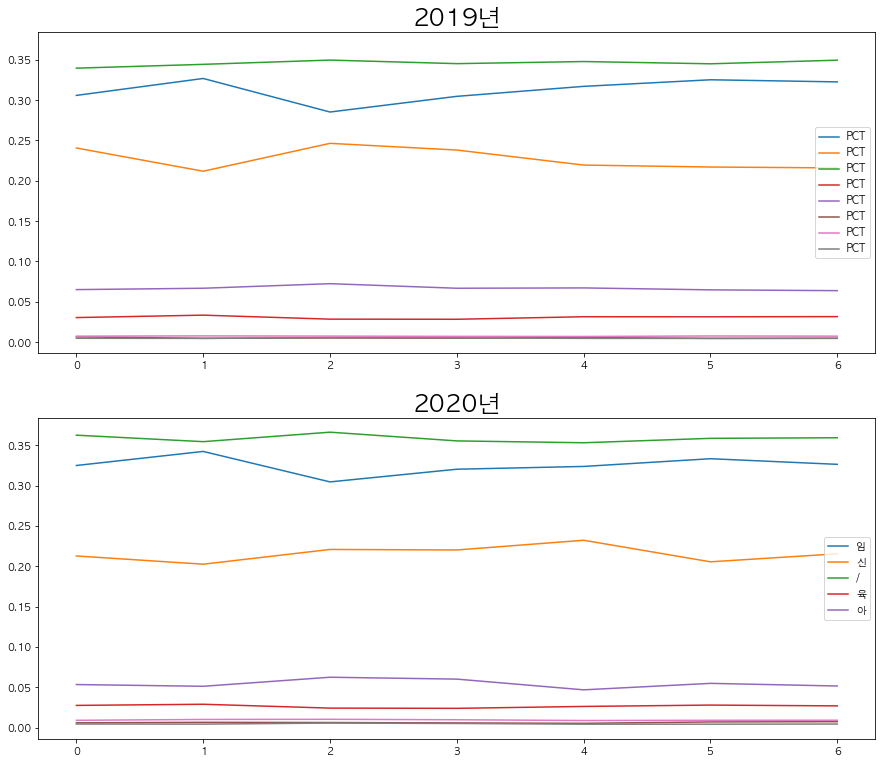

In [74]:
cat = item['ITEM_NM'].unique().tolist()

fig, ax = plt.subplots(2,1, figsize = (15,13), sharey = True )
ax[0].set_title('2019년', fontsize = 24)
ax[1].set_title('2020년', fontsize = 24)

for a in cat:
    item.query('OPER_DT >= "2019-05-31"').query('ITEM_NM == @a').groupby(['DAY'])['PCT'].mean().reset_index()\
    .plot(ax = ax[0], label = a)

for a in cat:
    item.query('OPER_DT <= "2020-02-01"').query('ITEM_NM == @a').groupby(['DAY'])['PCT'].mean().reset_index()\
    .plot(ax = ax[1], label = a)    
      
plt.legend(a)
plt.show()